# Adding is_sun_up column

In [1]:
from astral.sun import sun
from astral.geocoder import LocationInfo
import pytz
import pandas as pd

In [2]:
def calculate_sunrise_sunset_astral(df):
    """
    Calculate if the sun is up for each timestamp in the dataframe, adding a column to the df.
    Assumes a 'date' column with complete timestamps and 'latitude', 'longitude' columns.
    """
    def is_sun_up(row):
        location = LocationInfo(
            name="Custom",
            region="Custom",
            timezone="Europe/Paris",
            latitude=row['latitude'],
            longitude=row['longitude']
        )
        # Parse the date from the row and localize it to Paris timezone
        date = pd.Timestamp(row['date']).tz_localize('Europe/Paris')
        # Get sunrise and sunset times
        s = sun(location.observer, date)
        sunrise = s['sunrise'].astimezone(pytz.timezone(location.timezone))
        sunset = s['sunset'].astimezone(pytz.timezone(location.timezone))
        # Check if the timestamp is within sunrise and sunset
        return sunrise <= date <= sunset

    # Apply the function and create the is_sun_up column
    df['is_sun_up'] = df.apply(is_sun_up, axis=1)
    return df


In [3]:
# Example dataframe with a pre-created 'date' column
data = {
    'latitude': [48.8566, 48.8566],  # Paris
    'longitude': [2.3522, 2.3522],   # Paris
    'date': [
        "2020-06-21 05:48:00",  # Local time in Paris
        "2021-12-21 12:00:00"   # Local time in Paris
    ]
}
df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])

# Apply the function
df_with_sun_status = calculate_sunrise_sunset_astral(df)

df_with_sun_status.head()

,latitude,longitude,date,is_sun_up
0,48.8566,2.3522,2020-06-21 05:48:00,True
1,48.8566,2.3522,2021-12-21 12:00:00,True


## Inspecting the Weather Data provided by the teachers

In [4]:
weather = pd.read_csv("external_data/external_data.csv")
weather.head(5)

,numer_sta,date,pmer,tend,cod_tend,dd,ff,t,td,u,...,hnuage1,nnuage2,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4
0,7149,2021-01-01 00:00:00,100810,80,1,270,1.8,272.75,272.15,96,...,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7149,2021-01-01 03:00:00,100920,110,3,300,1.7,271.25,270.95,98,...,1500.0,2.0,3.0,3000.0,NaN,NaN,NaN,NaN,NaN,NaN
2,7149,2021-01-01 06:00:00,100950,30,3,290,2.6,271.95,271.65,98,...,480.0,4.0,6.0,2000.0,6.0,3.0,3000.0,NaN,NaN,NaN
3,7149,2021-01-01 09:00:00,101100,150,2,280,1.7,272.45,272.05,97,...,1740.0,3.0,3.0,2800.0,NaN,NaN,NaN,NaN,NaN,NaN
4,7149,2021-01-01 12:00:00,101110,30,0,50,1.0,276.95,274.15,82,...,330.0,4.0,6.0,570.0,7.0,6.0,810.0,NaN,NaN,NaN


In [5]:
weather.columns

Index(['numer_sta', 'date', 'pmer', 'tend', 'cod_tend', 'dd', 'ff', 't', 'td',
       'u', 'vv', 'ww', 'w1', 'w2', 'n', 'nbas', 'hbas', 'cl', 'cm', 'ch',
       'pres', 'niv_bar', 'geop', 'tend24', 'tn12', 'tn24', 'tx12', 'tx24',
       'tminsol', 'sw', 'tw', 'raf10', 'rafper', 'per', 'etat_sol', 'ht_neige',
       'ssfrai', 'perssfrai', 'rr1', 'rr3', 'rr6', 'rr12', 'rr24', 'phenspe1',
       'phenspe2', 'phenspe3', 'phenspe4', 'nnuage1', 'ctype1', 'hnuage1',
       'nnuage2', 'ctype2', 'hnuage2', 'nnuage3', 'ctype3', 'hnuage3',
       'nnuage4', 'ctype4', 'hnuage4'],
      dtype='object')

In [6]:
weather.shape

(3322, 59)

In [7]:
weather['numer_sta'].unique() # It is all coming from one station!

array([7149], dtype=int64)

In [8]:
print(f'From: {min(weather["date"])} Until: {max(weather["date"])}')

From: 2020-09-01 00:00:00 Until: 2021-10-21 12:00:00


### Updated Description of Columns in the Weather Dataset

| **Column Name** | **Description** |
|------------------|-----------------|
| **numer_sta**    | Station number (WMO identifier). |
| **date**         | Date and time of observation. |
| **pmer**         | Sea-level pressure (in tenths of hPa). |
| **tend**         | Pressure tendency over the past 3 hours (in tenths of hPa). |
| **cod_tend**     | Characteristic of pressure tendency (WMO code). |
| **dd**           | Wind direction (in degrees). |
| **ff**           | Wind speed (in m/s). |
| **t**            | Air temperature (in tenths of °C). |
| **td**           | Dew point temperature (in tenths of °C). |
| **u**            | Relative humidity (in %). |
| **vv**           | Horizontal visibility (in meters). |
| **ww**           | Present weather (WMO code). |
| **w1**           | Past weather (1st period, WMO code). |
| **w2**           | Past weather (2nd period, WMO code). |
| **n**            | Total cloud cover (in oktas, 0 = clear, 8 = overcast). |
| **nbas**         | Cloud cover of the lowest layer (in oktas). |
| **hbas**         | Height of the base of the lowest cloud layer (in meters). |
| **cl**           | Cloud type for low clouds (WMO code). |
| **cm**           | Cloud type for middle clouds (WMO code). |
| **ch**           | Cloud type for high clouds (WMO code). |
| **pres**         | Station-level pressure (in tenths of hPa). |
| **niv_bar**      | Barometric altitude (in meters). |
| **geop**         | Geopotential height (in gpm). |
| **tend24**       | 24-hour pressure tendency (in tenths of hPa). |
| **tn12**         | Minimum temperature over the past 12 hours (in tenths of °C). |
| **tn24**         | Minimum temperature over the past 24 hours (in tenths of °C). |
| **tx12**         | Maximum temperature over the past 12 hours (in tenths of °C). |
| **tx24**         | Maximum temperature over the past 24 hours (in tenths of °C). |
| **tminsol**      | Minimum soil temperature (in tenths of °C). |
| **sw**           | Soil moisture (arbitrary units). |
| **tw**           | Soil temperature (in tenths of °C). |
| **raf10**        | Maximum wind gust over the past 10 minutes (in m/s). |
| **rafper**       | Maximum wind gust over the past period (in m/s). |
| **per**          | Period of wind gust measurement (in minutes). |
| **etat_sol**     | State of the ground (WMO code). |
| **ht_neige**     | Snow depth (in cm). |
| **ssfrai**       | Fresh snow depth (in cm). |
| **perssfrai**    | Period of fresh snow measurement (in hours). |
| **rr1**          | Precipitation amount over the past 1 hour (in mm). |
| **rr3**          | Precipitation amount over the past 3 hours (in mm). |
| **rr6**          | Precipitation amount over the past 6 hours (in mm). |
| **rr12**         | Precipitation amount over the past 12 hours (in mm). |
| **rr24**         | Precipitation amount over the past 24 hours (in mm). |
| **phenspe1**     | Special phenomena (1st code). |
| **phenspe2**     | Special phenomena (2nd code). |
| **phenspe3**     | Special phenomena (3rd code). |
| **phenspe4**     | Special phenomena (4th code). |
| **nnuage1**      | Cloud cover of the 1st layer (in oktas). |
| **ctype1**       | Cloud type of the 1st layer (WMO code). |
| **hnuage1**      | Height of the 1st cloud layer (in meters). |
| **nnuage2**      | Cloud cover of the 2nd layer (in oktas). |
| **ctype2**       | Cloud type of the 2nd layer (WMO code). |
| **hnuage2**      | Height of the 2nd cloud layer (in meters). |
| **nnuage3**      | Cloud cover of the 3rd layer (in oktas). |
| **ctype3**       | Cloud type of the 3rd layer (WMO code). |
| **hnuage3**      | Height of the 3rd cloud layer (in meters). |
| **nnuage4**      | Cloud cover of the 4th layer (in oktas). |
| **ctype4**       | Cloud type of the 4th layer (WMO code). |
| **hnuage4**      | Height of the 4th cloud layer (in meters). |

---

### Notes
- **WMO Codes**: Many columns (e.g., `ww`, `cl`, `cm`, `ch`) use standard codes defined by the World Meteorological Organization (WMO) to represent weather conditions, cloud types, and phenomena.
- **Cloud Measurements**:
  - `n` represents total cloud cover in **oktas**.
  - `nnuage1`, `ctype1`, and `hnuage1` describe individual cloud layers, with similar patterns for higher layers (`nnuage2`, `ctype2`, `hnuage2`, etc.).
- **Visibility and Wind**:
  - `vv` measures visibility in meters.
  - `dd` and `ff` describe wind direction and speed, respectively.


### Explanation of Changes

We will try to discard as few columns as possible to utilize our data to the maximum. For categorical and numerical we try to use the mode and the median. But we also discard the columns if it contains more than 1000 missing values since it offers much less value to our model, and filling it with placeholder values is not sure to provide any value.

In [9]:
null_values = weather.isnull().sum()

non_zero_nulls = null_values[null_values != 0]
non_zero_nulls


w1              7
w2             10
n             156
nbas            5
hbas          453
cl            413
cm           1381
ch           1644
niv_bar      3322
geop         3322
tend24         10
tn12         2492
tn24         3322
tx12         2492
tx24         3322
tminsol      3321
sw           3322
tw           3322
raf10          10
etat_sol       52
ht_neige       49
ssfrai        445
perssfrai     445
rr1             9
rr3             6
rr6            16
rr12           22
rr24           24
phenspe1     3322
phenspe2     3322
phenspe3     3322
phenspe4     3322
nnuage1       449
ctype1        798
hnuage1       455
nnuage2      1627
ctype2       1879
hnuage2      1627
nnuage3      2704
ctype3       2852
hnuage3      2704
nnuage4      3280
ctype4       3235
hnuage4      3280
dtype: int64

In [10]:
weather = weather.copy()


weather['w1'].fillna(weather['w1'].mode()[0], inplace=True)
weather['w2'].fillna(weather['w2'].mode()[0], inplace=True)
weather['n'].fillna(weather['n'].mode()[0], inplace=True)
weather['cl'].fillna(weather['cl'].mode()[0], inplace=True)
weather['cm'].fillna(weather['cm'].mode()[0], inplace=True)
weather['ch'].fillna(weather['ch'].mode()[0], inplace=True)
weather['etat_sol'].fillna(weather['etat_sol'].mode()[0], inplace=True)
weather['nnuage1'].fillna(weather['nnuage1'].mode()[0], inplace=True)
weather['hnuage1'].fillna(int(weather['hnuage1'].mean()), inplace=True)
weather['ctype1'].fillna(weather['ctype1'].mode()[0], inplace=True)


weather['tend24'].fillna(weather['tend24'].median(), inplace=True)
weather['raf10'].fillna(weather['raf10'].median(), inplace=True)


weather['hbas'].fillna(int(weather['hbas'].mean()), inplace=True)
weather['nbas'].fillna(int(weather['nbas'].mean()), inplace=True)

weather[['ht_neige', 'ssfrai', 'perssfrai', 'rr1', 'rr3', 'rr6', 'rr12', 'rr24']] = \
weather[['ht_neige', 'ssfrai', 'perssfrai', 'rr1', 'rr3', 'rr6', 'rr12', 'rr24']].fillna(0)



In [11]:
columns_to_drop = weather.columns[weather.isnull().sum() > 1000]
weather.drop(columns=columns_to_drop, inplace=True)
weather.drop(columns="numer_sta", inplace=True)


In [12]:
null_values = weather.isnull().sum()

non_zero_nulls = null_values[null_values != 0]
non_zero_nulls


Series([], dtype: int64)

In [13]:
# function to clean the weather dataset
def weather_cleaning(weather):
    weather = weather.copy()

    weather['w1'].fillna(weather['w1'].mode()[0], inplace=True)
    weather['w2'].fillna(weather['w2'].mode()[0], inplace=True)
    weather['n'].fillna(weather['n'].mode()[0], inplace=True)
    weather['cl'].fillna(weather['cl'].mode()[0], inplace=True)
    weather['cm'].fillna(weather['cm'].mode()[0], inplace=True)
    weather['ch'].fillna(weather['ch'].mode()[0], inplace=True)
    weather['etat_sol'].fillna(weather['etat_sol'].mode()[0], inplace=True)
    weather['nnuage1'].fillna(weather['nnuage1'].mode()[0], inplace=True)
    weather['hnuage1'].fillna(int(weather['hnuage1'].mean()), inplace=True)
    weather['ctype1'].fillna(weather['ctype1'].mode()[0], inplace=True)


    weather['tend24'].fillna(weather['tend24'].median(), inplace=True)
    weather['raf10'].fillna(weather['raf10'].median(), inplace=True)


    weather['hbas'].fillna(int(weather['hbas'].mean()), inplace=True)
    weather['nbas'].fillna(int(weather['nbas'].mean()), inplace=True)

    weather[['ht_neige', 'ssfrai', 'perssfrai', 'rr1', 'rr3', 'rr6', 'rr12', 'rr24']] = \
    weather[['ht_neige', 'ssfrai', 'perssfrai', 'rr1', 'rr3', 'rr6', 'rr12', 'rr24']].fillna(0)

    columns_to_drop = weather.columns[weather.isnull().sum() > 1000]
    weather.drop(columns=columns_to_drop, inplace=True)

    return weather


In [14]:
weather['date']

0       2021-01-01 00:00:00
1       2021-01-01 03:00:00
2       2021-01-01 06:00:00
3       2021-01-01 09:00:00
4       2021-01-01 12:00:00
               ...         
3317    2020-09-30 09:00:00
3318    2020-09-30 12:00:00
3319    2020-09-30 15:00:00
3320    2020-09-30 18:00:00
3321    2020-09-30 21:00:00
Name: date, Length: 3322, dtype: object

---------------------

## Feature Engineering

We need to use one-hot-encoding for: 
- different days of the week
- seasons
- whether we are on the weekend or not 

Furthermore, although we would like to use one-hot encoding for the hours of the day, but this might strongly increase the training time for our models. Therefore we just want to divide a day into chunks which behave similarly. For this we will look at a typical day of the week.

In [1]:
import pandas as pd
df_train = pd.read_parquet("data/train.parquet")


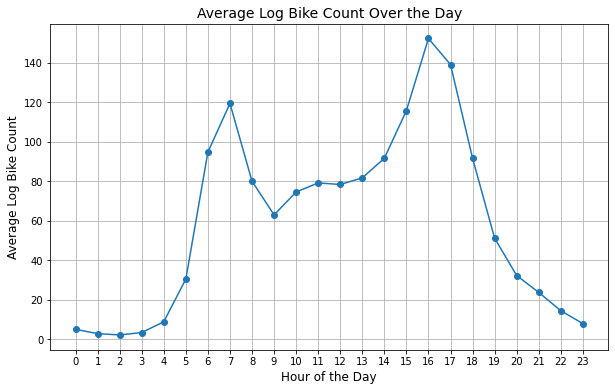

In [22]:
import matplotlib.pyplot as plt

df_train['hour'] = df_train['date'].dt.hour  # Extract hour from the 'date' column

# Group by hour and calculate the average 'log_bike_count'
hourly_avg = df_train.groupby('hour')['bike_count'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(hourly_avg.index, hourly_avg.values, marker='o')
plt.title('Average Log Bike Count Over the Day', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Log Bike Count', fontsize=12)
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

Looking at this average day graph we will choose the following 4 time intervals:
- Morgning: 5:00 - 8:30
- Working hours: 9:00 - 14:30
- Peak hours: 15:00 - 19:30
- Calm: 20:00 - 4:30

In [2]:
import external_data.example_estimator as ex

df_train = ex._encode_dates(df_train)
df_train.columns

NameError: name 'df_train' is not defined